# INTRODUCTION TO PATTERN RECOGNITION
## PROGRAMMING ASSIGNMENT -1

__1. Import essential libraries__
 * numpy
 * pandas
 * mlxtend.data to import the MNIST dataset
 * cv2 to write the images for mean and standard deviation

In [18]:
import numpy as np
import math
from mlxtend.data import loadlocal_mnist
import pandas as pd
import cv2

__2. Import the MNIST dataset__
  * Images path for features for the digits
  * Labels indicate the digits

In [19]:
X_train, y_train= loadlocal_mnist(images_path='train-images-idx3-ubyte',
                                  labels_path='train-labels-idx1-ubyte')

5


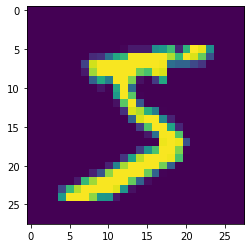

In [20]:
import matplotlib.pyplot as plt

a = X_train[0].reshape(28, 28)
plt.imshow(a)
print(y_train[0])

__3. Load the training dataset onto a dataframe, which makes it easier to access the data__

In [21]:
df=pd.DataFrame(X_train,y_train)

__4. Function that calculates the mean and standard deviation for all of the 10 classes (10 digits).__

* The mean for the data can be calulated by the following equation:
    
\begin{align}
\mu = \frac{( \sum X_i)}{N}
\end{align}
            
       * where the N is the length for each class of digits.
       * X is the individual features for each of the classes.
   
   
* The standard deviation for the data:</br>
    
\begin{align}
\sigma = \sqrt{\frac{\sum (  x_{ij} - \mu_i)}{N}}
\end{align}

In [22]:
def mandstd(n):
    x=[]
    y=[]
    s=0
    for i in range(n):
        l=df.loc[i]
        mean=l.sum()/len(l)
        diff=(l-mean)**2
        s=diff.sum()
        var=s/len(l)
        SD=np.sqrt(var)
        x.append(mean)
        y.append(SD)
        
    return x,y

__5. Calling the above function and storing the mean and standard deviation in 2 lists x and y.__

In [23]:
x,y=mandstd(10)

In [53]:
print(type(y[0]))

<class 'pandas.core.series.Series'>


__6. The next step is to convert the list and draw an image based on the results of mean and standard deviation.__

    * For the mean and standard deviation images we take all the 10 classes and convert it into a 28x28 pixel  matrix and pass it on to the imwrite() function provided by the opencv library.

In [24]:
x2=[]
y2=[]
for i in range(10):
    x2.append(np.array(x[i]).reshape(28,28))
    y2.append(np.array(y[i]).reshape(28,28))
    cv2.imwrite("mean{}.png".format(i),x2[i])
    cv2.imwrite("sd{}.png".format(i),y2[i])

### Images for mean












## Images for Standard Deviation












__7. Covariance matrix__
    
    * Covariance matrix is required in the LDA function.
    * The values are added along the diagonal.
    * An offset is added to the Variance matrix in order to avoid the Singular matrix ( Where the determinant of the matrix becomes 0.

In [51]:
# Offset so that the determinant of the matrix does not become 0.
for i in range(len(y)):
    for j in range(784):
        y[i][j]+=0.01

cov=[]
inv=[]
for i in range(len(y)):
    a=np.diag(y[i]**2)
    cov.append(a)
    b=np.linalg.inv(cov[i])
    inv.append(b)


__8. Loading the Testing data__

In [27]:
X_test, y_test=loadlocal_mnist(images_path='t10k-images-idx3-ubyte',
                                labels_path='t10k-labels-idx1-ubyte')

__9. Writing the LDA classifier to predict. __

 * Guassian Distribution - The LDA function is derived by the above equation.
 
\begin{align}
p(x)=\frac{1}{(2π)^{d/2}|\sum|^{1/2}}exp(−\frac{1}{2}(x−\mu)^{′}\sum^{−1}(x−\mu))
\end{align}

 * Then we take Log Likelyhood of the above equation to get the discriminant function.
 
 \begin{align}
\boldsymbol{g_{i}(x) = \log p(x|\omega_i) + \log P(\omega_i)}
\end{align}
\begin{align}
\newline = -\frac{1}{2}(x - \mu_{i})^{-1} \sum^{-1}(x - \mu_{i}) - \frac{d}{2} \log (2 \pi) -\frac{1}{2} \log |\sum_i| + \log P(\omega_i)
\end{align}

 * Now we take the case 3 of the LDA, as we have different Standard Deviations for different classes:
   Case 3 is defined by:
   
\begin{align}
\boldsymbol{g_i = x^{t} W_i x + N_{i}^{t} x + B_{i0}}
\end{align}
\begin{align}
\newline
where, W_i = - \frac{1}{2} \sum_{i}^{-1} , N_{i} = \sum_{i}^{-1} \mu_{i} and B_{i0} = - \frac{1}{2} \mu_{i}^{t} \sum_{i}^{-1} \mu_{i} + ln P(w_i) - \frac{1}{2} ln |\sum_{i}| 
\end{align}
 
 

In [28]:
W=[]
N=[]
B=[]
g=[]
y_pred=[]
a=np.asarray(inv)
b=np.asarray(x)
for i in range(len(y)):
    W.append(a[i]*(-0.5))
    N.append(np.matmul(a[i],b[i]))
    b1=np.matmul(np.matmul(b[i].T, a[i]), b[i])
    B.append((-0.5)*b1)
    
N=np.asarray(N)
for i in range(10000):
    g=[]
    for j in range(10):
        g1=B[j]
        g2=np.matmul(N[j].T,X_test[i])
        g3=np.matmul(np.matmul(X_test[i].T, W[j]), X_test[i])
        g.append(g1+g2+g3)
    
    y_pred.append(np.argmax(g))

__10. 0-1 Loss function__
\begin{align}
\boldsymbol{\lambda =}
\begin{cases}
     0, i=j\\
    \newline 1,i \neq j\\
\end{cases}
\end{align}

The 0-1 loss function is used to find the accuracy. This is done by finding the the number of 1's when the predicted value is same as the data from test data and 0's when the predicted value is false.

In [29]:
y_pred=np.asarray(y_pred)
y_test=np.asarray(y_test)
it=np.nditer(y_pred)
it1=np.nditer(y_test)
trues=[]
falses=[]
count=0

while not it.finished:
    if(it[0]==it1[0]):
        trues.append(1)
    it.iternext()
    it1.iternext()
    
while not it.finished:
    if(it[0]!=it1[0]):
        falses.append(0)
    it.iternext()
    it1.iternext()
    
count=np.count_nonzero(trues)+np.count_nonzero(falses==0)
print("Accuracy:",(count/len(y_test))*100)

Accuracy: 81.73


__Q. Why it doesn't perform as good as many other methods on LeCuns web page?__

A. There are few reasons why LDA does not perform better than the other methods performed on LeCuns web page:
   * We are performing the LDA function based on the assumption that the MNIST dataset is a guassian distribution, 
     but the guassian distribution does not perform well on high dimensional data images.
   * One more reason is that the LDA tries to find a hyperplane such that the variances are maximized which is not 
     an optimal hyperplane whereas when we consider a single layer perceptron or a multilayer perceptron, it tries 
     find optimal hyperplane to disjoin the labelled dataset.